K-Means Accuracy: 21.18%
Spectral Clustering Accuracy: 73.99%


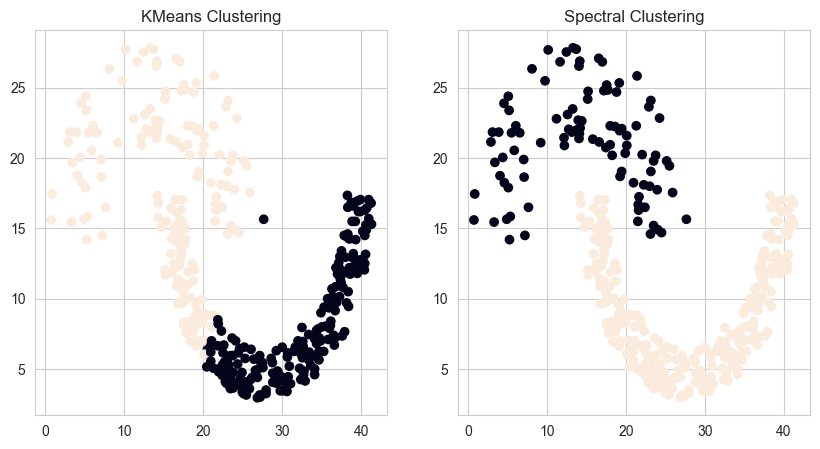

In [1]:
# Question 1

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("jain.txt")
np.random.seed(50)
X = data[:, :2]
ground_truth_labels = data[:, 2]

def kmeans_clustering(X, n_clusters):
    centroids = X[np.random.choice(len(X), n_clusters, replace=False)]
    for _ in range(10):
        labels = ((X[:, None] - centroids[None]) ** 2).sum(axis=-1).argmin(axis=-1)
        for i in range(n_clusters):
            centroids[i] = X[labels == i].mean(axis=0)
    return labels

def spectral_clustering(X, n_clusters):
    W = np.exp(-np.sum((X[:, None] - X[None]) ** 2, axis=-1) / 2)
    D = np.diag(W.sum(axis=1))
    L = D - W
    eigenvalues, eigenvectors = np.linalg.eig(L)
    indices = np.argsort(eigenvalues)[:n_clusters]
    U = eigenvectors[:, indices]
    U = U / np.sqrt((U ** 2).sum(axis=1, keepdims=True))
    centroids = U[np.random.choice(len(U), n_clusters, replace=False)]
    for _ in range(10):
        labels = ((U[:, None] - centroids[None]) ** 2).sum(axis=-1).argmin(axis=-1)
        for i in range(n_clusters):
            centroids[i] = U[labels == i].mean(axis=0)
    return labels

def calculate_accuracy(predicted_labels, ground_truth_labels):
    predicted_labels = np.array(predicted_labels)
    ground_truth_labels = np.array(ground_truth_labels)
    accuracy = np.sum(predicted_labels == ground_truth_labels) / len(ground_truth_labels)
    return accuracy

kmeans_labels = kmeans_clustering(X, n_clusters=2)
kmeans_accuracy = calculate_accuracy(kmeans_labels, ground_truth_labels)
print(f"K-Means Accuracy: {kmeans_accuracy * 100:.2f}%")

spectral_labels = spectral_clustering(X, n_clusters=2)
spectral_accuracy = calculate_accuracy(spectral_labels, ground_truth_labels)
print(f"Spectral Clustering Accuracy: {spectral_accuracy * 100:.2f}%")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.title('KMeans Clustering')
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels)
plt.title('Spectral Clustering')
plt.show()

Accuracy of Spectral Clustering before PCA: 7.33%
Accuracy of Spectral Clustering after PCA: 74.67%
Reconstruction Error at k=1: 0.0855
Reconstruction Error at k=2: 0.0254
Reconstruction Error at k=3: 0.0059


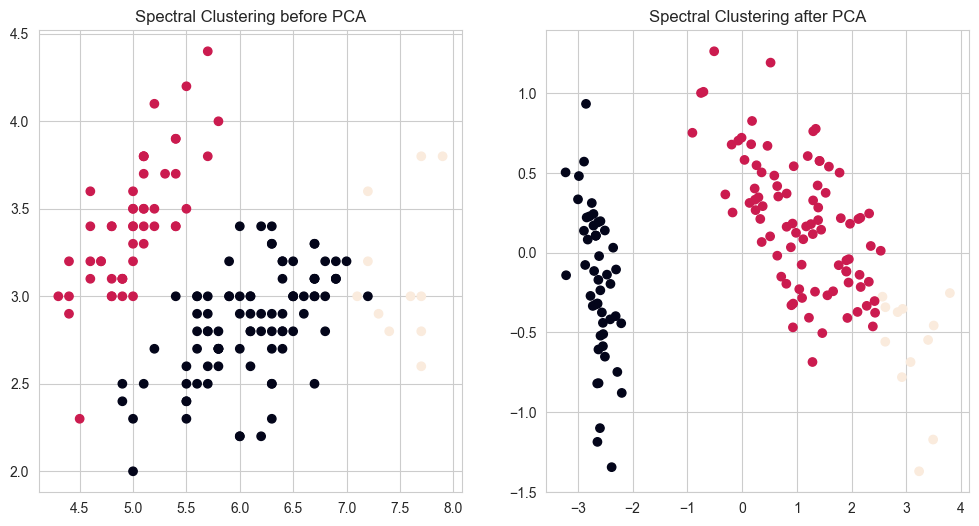

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

np.random.seed(80)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = urllib.request.urlopen(url)
data = response.read().decode("utf-8")

lines = data.strip().split("\n")
X = []
ground_truth_labels = []
for line in lines:
    parts = line.strip().split(",")
    features = [float(x) for x in parts[:4]]
    label = parts[4]
    X.append(features)
    ground_truth_labels.append(label)
X = np.array(X)
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
encoded_ground_truth_labels = [label_map[label] for label in ground_truth_labels]

def spectral_clustering(X, n_clusters):
    W = np.exp(-np.sum((X[:, None] - X[None]) ** 2, axis=-1) / 2)
    D = np.diag(W.sum(axis=1))
    L = D - W
    eigenvalues, eigenvectors = np.linalg.eig(L)
    indices = np.argsort(eigenvalues)[:n_clusters]
    U = eigenvectors[:, indices]
    U = U / np.sqrt((U ** 2).sum(axis=1, keepdims=True))
    centroids = U[np.random.choice(len(U), n_clusters, replace=False)]
    for _ in range(10):
        labels = ((U[:, None] - centroids[None]) ** 2).sum(axis=-1).argmin(axis=-1)
        for i in range(n_clusters):
            centroids[i] = U[labels == i].mean(axis=0)
    return labels

def pca(X, k):
    X_centered = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_centered.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    indices = np.argsort(eigenvalues)[::-1]
    top_k_indices = indices[:k]
    components = eigenvectors[:, top_k_indices]
    projected_data = np.dot(X_centered, components)
    reconstructed_data = np.dot(projected_data, components.T) + np.mean(X, axis=0)
    reconstruction_error = np.mean(np.square(X - reconstructed_data))
    return projected_data, reconstruction_error

X_pca, _ = pca(X, 2)  # Unpack the tuple and ignore the reconstruction error

def calculate_accuracy(predicted_labels, ground_truth_labels):
  predicted_labels = np.array(predicted_labels, dtype=int)
  ground_truth_labels = np.array(ground_truth_labels, dtype=int)
  accuracy = np.sum(predicted_labels == ground_truth_labels) /len(ground_truth_labels)
  return accuracy

labels_before_pca = spectral_clustering(X, n_clusters=3)
accuracy_before_pca = calculate_accuracy(labels_before_pca, encoded_ground_truth_labels)
print(f"Accuracy of Spectral Clustering before PCA: {accuracy_before_pca * 100:.2f}%")

labels_after_pca = spectral_clustering(X_pca, n_clusters=3)  # Pass only the projected data
accuracy_after_pca = calculate_accuracy(labels_after_pca, encoded_ground_truth_labels)
print(f"Accuracy of Spectral Clustering after PCA: {accuracy_after_pca * 100:.2f}%")

ks = [1, 2, 3]
reconstruction_errors = []
for k in ks:
    _, error = pca(X, k)
    reconstruction_errors.append(error)
for k, error in zip(ks, reconstruction_errors):
    print(f"Reconstruction Error at k={k}: {error:.4f}")


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_before_pca)
plt.title('Spectral Clustering before PCA')
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_after_pca)
plt.title('Spectral Clustering after PCA')
plt.show()